In [148]:
import fastbook
fastbook.setup_book()

In [149]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

## Creating a "3 or 7" Image Classifier 

Download a sample of MNIST that contains images of just these digits

assign unzipped data to path.
URLs provides methods that grab from a provided list of urls

In [150]:
path = untar_data(URLs.MNIST_SAMPLE)

Path class inherits from "Purepath" and can make system calls. Returns a posix or windows path

assign path to Path at BASE_PATH

In [151]:
Path.BASE_PATH = path

seeing what's inside with bash commands provided by fastai methods

In [152]:
path.ls()

(#3) [Path('labels.csv'),Path('valid'),Path('train')]

In [153]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

two folders in path - 3's and 7's
assign each, using sorted provided by fastai

In [154]:
threes = (path/'train/3').ls().sorted()
sevens = (path/'train/7').ls().sorted()
sevens

(#6265) [Path('train/7/10002.png'),Path('train/7/1001.png'),Path('train/7/10014.png'),Path('train/7/10019.png'),Path('train/7/10039.png'),Path('train/7/10046.png'),Path('train/7/10050.png'),Path('train/7/10063.png'),Path('train/7/10077.png'),Path('train/7/10086.png')...]

Show an image of a 7 from MNIST using image class from PIL

In [155]:
im7_path = sevens[3]
im7 = Image.open(im7_path)
im7

view the above image represented as a number
convert to numpy array and request rows from index 4 to index 10
and request columns from index 4 to index 10

In [156]:
array(im7)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  19],
       [  0,   0,   0,   0,  13, 144]], dtype=uint8)

Now the same for a pytorch tensor

In [157]:
tensor(im7)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  19],
        [  0,   0,   0,   0,  13, 144]], dtype=torch.uint8)

create a tensor object
slice and assign to dataframe
set font size and color

In [158]:
im7_t = tensor(im7)
df = pd.DataFrame(im7_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,29,104,141,241,192,60,0,0,0,0
3,0,0,0,0,0,0,0,101,253,252,252,252,253,234,131,32,0,0
4,0,0,0,0,0,19,123,246,253,252,252,177,119,224,252,228,38,0
5,0,0,0,0,13,144,252,252,253,227,103,3,0,44,228,252,113,0
6,0,0,0,0,154,253,253,253,239,75,0,0,0,7,204,253,114,0
7,0,0,0,76,253,252,252,227,88,0,0,0,0,57,252,252,113,0
8,0,0,0,113,253,252,186,43,0,0,0,0,0,95,252,252,25,0
9,0,0,0,13,140,115,6,0,0,0,0,0,13,206,252,102,0,0


Create list of single image tensors, check length

In [159]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

Check an image to make sure it looks correct

<AxesSubplot: >

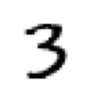

In [160]:
show_image(three_tensors[1])

Compute the average over all the images of the intensity at each pixel

To do this we have to combine or **stack** all the image in the list
and create a *single 3 dimensional* tensor

Common description of a 3 dimensional tensor is a *rank-3 tensor*

This is a pretty common occurance, and pytorch has a function called
*stack* to do this.

Some operations like taking a mean require us to *cast* our integer types to float types.

In pytorch there is a method *.float()* that can be called to do this

Pixel values are expected to be between 0 and 1 so we can divide by 255 to get this value

In [161]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

*** 

#### QUICK EXPERIMENT - Tensor Dimensions
- Start with 2D List converted to tensor

*** 

In [162]:
test_list = [[1, 2, 3, 4],
             [5, 6, 7, 8],
             [9, 8, 7, 6]]
test_tensor = tensor(test_list)
print(test_list)
print(test_tensor)

[[1, 2, 3, 4], [5, 6, 7, 8], [9, 8, 7, 6]]
tensor([[1, 2, 3, 4],
        [5, 6, 7, 8],
        [9, 8, 7, 6]])


create other tensors by multiplying by existing tensors. Multiplying by a number doesn't really work as it changes the dimensions

In [163]:
print(test_tensor)
test_tensor_2 = test_tensor * test_tensor
print(test_tensor_2)
test_tensor_3 = test_tensor * test_tensor_2
print(test_tensor_3)
test_tensor_4 = test_tensor * test_tensor_3
print(test_tensor_4)
test_tensor_5 = test_tensor * test_tensor_4
print(test_tensor_5)


tensor([[1, 2, 3, 4],
        [5, 6, 7, 8],
        [9, 8, 7, 6]])
tensor([[ 1,  4,  9, 16],
        [25, 36, 49, 64],
        [81, 64, 49, 36]])
tensor([[  1,   8,  27,  64],
        [125, 216, 343, 512],
        [729, 512, 343, 216]])
tensor([[   1,   16,   81,  256],
        [ 625, 1296, 2401, 4096],
        [6561, 4096, 2401, 1296]])
tensor([[    1,    32,   243,  1024],
        [ 3125,  7776, 16807, 32768],
        [59049, 32768, 16807,  7776]])


Get the shape of the tensors
- *Update* - Notebooks will only output the latest call on shape

In [164]:
test_tensor.shape
test_tensor_2.shape

torch.Size([3, 4])

Attempt to assing shape to variable so that it can be printed later
- *Update* - This works

In [165]:
shape_1 = test_tensor.shape
print(shape_1)
shape_2 = test_tensor_2.shape
print(shape_2)

torch.Size([3, 4])
torch.Size([3, 4])


Stack the tensors
- *Update* Tensors need to be in a tuple or a list to stack

In [166]:
test_tensor_list = [test_tensor, test_tensor_2, test_tensor_3, test_tensor_4, test_tensor_5]
stacked_test_tensors = torch.stack(test_tensor_list)
print(stacked_test_tensors)

tensor([[[    1,     2,     3,     4],
         [    5,     6,     7,     8],
         [    9,     8,     7,     6]],

        [[    1,     4,     9,    16],
         [   25,    36,    49,    64],
         [   81,    64,    49,    36]],

        [[    1,     8,    27,    64],
         [  125,   216,   343,   512],
         [  729,   512,   343,   216]],

        [[    1,    16,    81,   256],
         [  625,  1296,  2401,  4096],
         [ 6561,  4096,  2401,  1296]],

        [[    1,    32,   243,  1024],
         [ 3125,  7776, 16807, 32768],
         [59049, 32768, 16807,  7776]]])


Get stacked tensor shape
- *Update* - Can be thought of for right now as indexing Z,X,Y

In [167]:
print(stacked_test_tensors.shape)
print(len(stacked_test_tensors.shape))

torch.Size([5, 3, 4])
3


Get all items in stack at row 0, axis 1


In [168]:
row_index = 0
axis_index = 1
selected_row = stacked_test_tensors[:,row_index,axis_index]
print(selected_row)

tensor([ 2,  4,  8, 16, 32])


*** 

#### RESUME

*** 

*shape* is the most important attribute of a tensor. It tells you
the length of each axis. The above is saying there are 6131 images, each of size 28x28 pixels

nothing about the tensor specificallys says first is images, second is height in pixels, third is height in pixels. This is all up to us and how we construct it

The *length* of the tensor shape is it's *rank*

In [169]:
len(stacked_sevens.shape)

3

**Important Terms to Memorize** <br>
*Rank* - the number of axes or dimensions of a tensor<br>
*Shape* - the size of each axis of a tensor<br>

Dimension is used in a confusing way sometimes
A "3D" physical position can be described with vectors, but to pytorch,
the number of dimensions is == 1.

This is because even though it's 3 items long, it's still only one axis
Ex. "3 Dimensional"
Sometimes dimension is used for *size of axis* [1,2,3]
Sometimes it's used for *rank*  [1,2,3]
                                [1,2,3]
                                [1,2,3]

Describing in terms of **rank, axis, and length** are unambiguous

A tensor's rank can be obtained with `ndim`

In [170]:
stacked_threes.ndim

3

Compute what *ideal* 3 looks like - 
- Calculate the mean of all image tensors
    - Take the mean along dimension 0 of this stacked, rank-3 tensor
    - So for every pixel position, compute the average of that pixel over all images
    - Result is one value for every pixel position, == One Image

![title](../img/tensor_dims.jpeg)

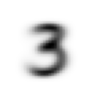

In [171]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

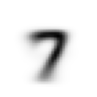

In [172]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

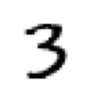

In [173]:
a_3 = stacked_threes[1]
show_image(a_3);

2 Ways<br>
Take the mean of the *absolute value* of differences
- Called the *mean absolute difference* or *L1 norm*<br>
Take the mean of the *square* of differences(which also makes positive)
and then take the square root(to undo squaring)
- Called the *root mean squared error* (RMSE) or *L2 Norm*

Try out both methods:

In [174]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs, dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [175]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs, dist_7_sqr

(tensor(0.1586), tensor(0.3021))

*** 

Guessing Sidebar<br>
What do each of the above mean?
We have 2 types of differences, with the differences for both methods showing about a ~50% increase in difference when the example 3 image is measured against the 7 vs. itself.

How are we going to apply these numbers? We have a tensor returned for each of the 4 operations(2 that are "Ideal 3" vs "Test 3", and 2 that are "Ideal 7" vs "Test 3")

There is a difference, but are we just going to iterate over every pixel and test the difference?

If so how do we aggregate results, if at all?

*** 

#### Resume

Both methods show a shorter distance from our example 3 to ideal 3 than example 7 to ideal 3 

So we can infer that our model will give the correct prediction

Pytorch provides both of these as *loss functions*
They're in `torch.nn.functional`, which is recommended to import as "F"

(Same as Pandas - import as "PD")

Fastai already does this so it's available with F as the default name

Worth noting that we have to call the float method on a_3 here, and for `mse_loss` we have to add the square root
as the mean squared error is just that - it's not the "mean squared error squareroot" - so, makes sense

Both of these take an input and a target, with the input being the item to be compared, and the target being the mean
So need to remember that the target is what the input will be running against

In [176]:
F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3.float(),mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

Note: Difference between the L1 norm and MSE is that the MSE will penalize larger mistakes more harshly, as well as being more lenient on small mistakes - I'm going to sidebar to get a visual on this

*** 

#### QUICK EXPERIMENT <br>
My dumbass trying to refamiliarize myself with basic math


Let's run through this real quick my stacked_test_tensors<br>
So here's the state at the beginning

In [177]:
print(stacked_test_tensors)

tensor([[[    1,     2,     3,     4],
         [    5,     6,     7,     8],
         [    9,     8,     7,     6]],

        [[    1,     4,     9,    16],
         [   25,    36,    49,    64],
         [   81,    64,    49,    36]],

        [[    1,     8,    27,    64],
         [  125,   216,   343,   512],
         [  729,   512,   343,   216]],

        [[    1,    16,    81,   256],
         [  625,  1296,  2401,  4096],
         [ 6561,  4096,  2401,  1296]],

        [[    1,    32,   243,  1024],
         [ 3125,  7776, 16807, 32768],
         [59049, 32768, 16807,  7776]]])


Let's create another ndim tensor so that there's something to compare all this against

In [178]:
stacked_test_tensors_2 = stacked_test_tensors * 4
print(stacked_test_tensors_2)

tensor([[[     4,      8,     12,     16],
         [    20,     24,     28,     32],
         [    36,     32,     28,     24]],

        [[     4,     16,     36,     64],
         [   100,    144,    196,    256],
         [   324,    256,    196,    144]],

        [[     4,     32,    108,    256],
         [   500,    864,   1372,   2048],
         [  2916,   2048,   1372,    864]],

        [[     4,     64,    324,   1024],
         [  2500,   5184,   9604,  16384],
         [ 26244,  16384,   9604,   5184]],

        [[     4,    128,    972,   4096],
         [ 12500,  31104,  67228, 131072],
         [236196, 131072,  67228,  31104]]])


**L1** Alright lets see how different this gets - First the absolute value of the difference

In [179]:
stacked_test_diff = stacked_test_tensors_2 - stacked_test_tensors
print(stacked_test_diff.abs())

tensor([[[     3,      6,      9,     12],
         [    15,     18,     21,     24],
         [    27,     24,     21,     18]],

        [[     3,     12,     27,     48],
         [    75,    108,    147,    192],
         [   243,    192,    147,    108]],

        [[     3,     24,     81,    192],
         [   375,    648,   1029,   1536],
         [  2187,   1536,   1029,    648]],

        [[     3,     48,    243,    768],
         [  1875,   3888,   7203,  12288],
         [ 19683,  12288,   7203,   3888]],

        [[     3,     96,    729,   3072],
         [  9375,  23328,  50421,  98304],
         [177147,  98304,  50421,  23328]]])


**MSE** Now the mean square error

In [180]:
stacked_test_squared = ((stacked_test_tensors_2 - stacked_test_tensors)**2).sqrt()
print(torch.round(stacked_test_squared, decimals=1))
print('hello')

tensor([[[3.0000e+00, 6.0000e+00, 9.0000e+00, 1.2000e+01],
         [1.5000e+01, 1.8000e+01, 2.1000e+01, 2.4000e+01],
         [2.7000e+01, 2.4000e+01, 2.1000e+01, 1.8000e+01]],

        [[3.0000e+00, 1.2000e+01, 2.7000e+01, 4.8000e+01],
         [7.5000e+01, 1.0800e+02, 1.4700e+02, 1.9200e+02],
         [2.4300e+02, 1.9200e+02, 1.4700e+02, 1.0800e+02]],

        [[3.0000e+00, 2.4000e+01, 8.1000e+01, 1.9200e+02],
         [3.7500e+02, 6.4800e+02, 1.0290e+03, 1.5360e+03],
         [2.1870e+03, 1.5360e+03, 1.0290e+03, 6.4800e+02]],

        [[3.0000e+00, 4.8000e+01, 2.4300e+02, 7.6800e+02],
         [1.8750e+03, 3.8880e+03, 7.2030e+03, 1.2288e+04],
         [1.9683e+04, 1.2288e+04, 7.2030e+03, 3.8880e+03]],

        [[3.0000e+00, 9.6000e+01, 7.2900e+02, 3.0720e+03],
         [9.3750e+03, 2.3328e+04, 5.0421e+04, 9.8304e+04],
         [1.7715e+05, 9.8304e+04, 5.0421e+04, 2.3328e+04]]])
hello


Alright not quite the output I was looking for, but I got the gist

*** 

#### RESUME

*** 

NumPy and PyTorch are similar in that they can both be much faster than most python because their data structures are written in optimized C. 

PyTorch has to use a single numeric type for all it's components

It's tensors also can't be jagged(innermost arrays being different sizes)

This is because of how the GPU takes matrix operations

PyTorch can also automatically calculate derivatives of operations - which is required for deep learning



#### Tensor Basics

To create an array/tensor, pass a list or list of lists to `array()` or `tensor()`

In [181]:
data = [[2,4,6],[5,6,7]]
arr = array(data)
tns = tensor(data)

In [182]:
#numpy
arr

array([[2, 4, 6],
       [5, 6, 7]])

In [183]:
#pytorch
tns

tensor([[2, 4, 6],
        [5, 6, 7]])

select row

In [184]:
tns[1,:]

tensor([5, 6, 7])

In [185]:
#same
tns[1]

tensor([5, 6, 7])

In [186]:
tns[:,1]

tensor([4, 6])

In [187]:
tns[1,1:3]

tensor([6, 7])

In [188]:
tns+1

tensor([[3, 5, 7],
        [6, 7, 8]])

In [189]:
tns.type()

'torch.LongTensor'

In [190]:
tns*1.5

tensor([[ 3.0000,  6.0000,  9.0000],
        [ 7.5000,  9.0000, 10.5000]])

*** 

## Computing Metrics Using Broadcasting

*** 

In practice use *accuracy* as the metric for classification models

Calculate *accuracy* metric over a *validation set* to prevent overfitting

Not a huge risk here, but going to use a validation set to follow normal practices and to be ready for second try

**Below**<br>
- iterate over and open all images in the validation set directories
- stack tensors
- convert to float between 0 and 1 and reassign
- output shape of resulting tensors

In [191]:
valid_3_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255

valid_7_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

You should be checking shapes as you go

We want to create a function called `is_3` that will decide if an image is a 3 or a 7.

It will decide which of the two ideal digits the image is closer to

We need to define distance and calculate it

Calc mean abs error below
- define function that takes 2 parameters
- return average of absolute values of parameter difference
- pass `a_3` sample image and `mean3` ideal image to function

In [192]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

tensor(0.1114)

Both are single image tensors with a shape of `[28x28]`

To calculate overall accuracy, we need to extrapolate to calculate the distance for *every* image in the validation set

A loop could be used to go through every single-image tensor that are stacked in the validation set `valid_3_tens`, which is 1010 images, but that's not as efficient 

When we take the distance function used for comparing single images but pass it our whole validation(`valid_3_tens`) set tensor stack:

In [193]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1488, 0.1145, 0.1158,  ..., 0.1129, 0.1419, 0.1669]),
 torch.Size([1010]))

Even though the shapes don't match, it returns the distance of every single image as a vector(rank-1 tensor)

How does it do this?
- When pytorch tries to perform a simple subtraction between two tensors of different ranks, it uses **broadcasting**
- That is, it automatically expands the tensor with the smaller rank to have the same size as the one with the larger rank
- This makes tensor code much easier to write

After broadcasting, pytorch applies usual logic to tensors of the same rank

In [194]:
tensor([3,4,7]) + tensor(1)

tensor([4, 5, 8])

In [195]:
tensor([3,4,7]) + tensor([1])

tensor([4, 5, 8])

So pytorch treats `mean3`, a rank-2 tensor of a single image as 1010 copies of itself, then subtracts each from the validation set

*** 


#### QUESTION<br>
What shape would we expect the above `mean3` tensor to have?
- Well, what shape is `mean3`?


In [196]:
mean3.shape

torch.Size([28, 28])

It would have to be the same shape as the target to work. What is the target?

In [197]:
valid_3_tens.shape

torch.Size([1010, 28, 28])

Ok so guessing they're the same at [1010, 28, 28]

Correct!

***

In [198]:
(valid_3_tens-mean3).shape

torch.Size([1010, 28, 28])

Worth noting - 
- Pytorch doesn't actually copy `mean3` 1010 times, it pretends it were a tensor of that shape but doesn't allocate extra memory
- Does the whole calculation in C on the GPU, thousands to millions of times faster than pure python(upper is GPU)


This is true for **ALL BROADCASTING AND ELEMENTWISE OPERATIONS AND FUNCTIONS DONE IN PYTORCH** 
#### IT'S THE MOST IMPORTANT TECHNIQUE FOR YOU TO KNOW TO CREATE EFFICIENT PYTORCH CODE

Our function is applying `abs()` elementwise - that is to each element in the tensor stack

So it returns 1010 matrices of abs values

The `mean((-1,-2))` - -1,-2 represents a range of axes
- -1 being the last element
- -2 refers to the second to last
- So in this case we're getting the last two axes of the tensor


Why?

In [199]:
valid_3_tens.shape

torch.Size([1010, 28, 28])

If we look at the shape above, the last element and second to last elements are the ones we want, the "x & y" of this basically

If we averaged the number of pics - it probably wouldn't work out so well

After taking the mean we're leftover with just [1010] as our final size 

For every image we averaged the intensity of all the pixels in that image

We're going to use our function below to
- pass a variable(x)
- check that the distance between (x and mean3) is less than (x and mean 7)
- so returning a boolean based on whether that condition passes for each x

In [200]:
def is_3(x): return mnist_distance(x, mean3) < mnist_distance(x, mean7)

Testing on example case

In [201]:
print(is_3(a_3))

tensor(True)


Interesting - it returns `True` in a tensor

In [202]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

Ah ok, there we go, True and False as binary 1 and 0    

Now to test it on the validation set

In [203]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

Now calculate the accuracy for each of the 3s and 7s by taking the average of that function for all 3s and inverse it for all 7s

In [204]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = 1-is_3(valid_7_tens).float().mean()

accuracy_3s, accuracy_7s, (accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

Great - above 90% accuracy 

*** 

## Stochastic Gradient Descent (SGD)

We have to make our model learn from it's experience - Represent it the way that Arthur Samuel described it. 

Instead of trying to find a similarity between an image and an "ideal image" we could
- look at each pixel
- come up with a set of weights for each one
- highest weights associated with pixels most likely to be black for a particular category

ex. Low right pixels would be low for a 7, higher for an 8

This can be represented as a function and set of weight values for each possible category 

ex. Probability of being number 8 below:

- create a function that takes 2 parameters, x - image as vector, w - vector
- multiply the image tensor by the vector tensor
- sum of all items in tensors

In [205]:
(test_tensor*test_tensor).sum()

tensor(434)

In [206]:
def pr_eight(x,w): return (x*w).sum()

Need to find a way to auto-update weights and make better until they're as good as we can make them

Want to find specific values for vector `w` that causes the result of our function to be high for numbers that are actual 8s, and low for those not.

Finding best vector `w` is best way to find best function for finding 8s - currently limited by not using a deep neural network - will add later

Steps to take:
1. Initialize the weights
2. For each image, use weights to *predict* if it appears 3 or 7
3. Based on predictions, calculate how good model is (*loss*)
4. Calc. *gradient* - which measures for each weight how changing that weight would change the loss
5. *Step*, aka change, all the weights based on that calculation
6. goto 2
7. Iterate until we decide to stop training - due to model performance or time constraints



These seven steps are key to training all deep learning models

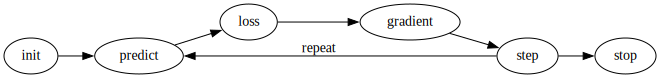

In [207]:
#id gradient_descent
#caption The gradient descent process
#alt Graph showing the steps for Gradient Descent
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

Many ways to do each of the seven steps, many details that make a difference

But some general guidelines:

- Initialize:: Init params to random values
- Loss:: *Testingthe effectiveness of current weight in terms of actual performance* Need a function that will return a number that is small if performance is good
- Step:: a simple way would be to increment manually to find direction then fiddle with step interval - but that's too slow. Need to use calculus to calculate *gradients* for performance optimization
- Stop:: Once epoch number is decided, apply that decision. For digit classifier, we'd keep training until accuracy started getting worse, or we ran out of time

Before applying steps, illustrate what they look like in a simpler case below:

Define simple function - the quadratic - pretend this is our loss function, and x is a weight param of the function

In [208]:
def f(x): return x**2

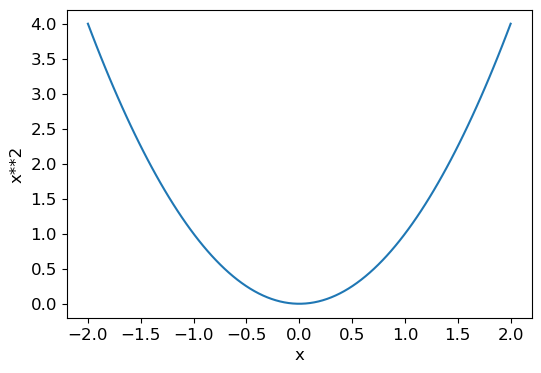

In [209]:
plot_function(f, 'x', 'x**2')

Start by picking random value for param and calc loss value

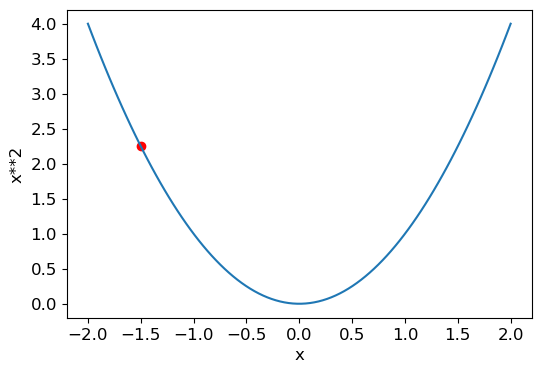

In [210]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color="red")

Then we look and see what happens if we increase or decrease our param by a little - *adjustment*

This is just the slope at a particular point

<img alt="A graph showing the squared function with the slope at one point" width="400" src="images/grad_illustration.svg"/>

We can change our weight just a bit in the direction of the slope, calculate our loss and adjustment again, and repeat this a couple times, eventually leading to our lowest point on the curve 

<img alt="An illustration of gradient descent" width="400" src="images/chapter2_perfect.svg"/>

This is a basic idea that goes back to Newton - we can optimize arbitrary functions in this way. 

Regardless of how complicated functions become, basic *gradient descent* approach won't change much

The only changes we'll see going through the fastai book are some ways to make it faster with better steps

*** 

#### Calculating Gradients

*** 

Calculus will allow us to more rapidly calculate whether the loss is going up or down when we adjust params up or down

aka - gradients will tell us how much we have to change each weight to improve the model

Need some level of intuition about what derivatives are to proceed 

*** 

### Experiment - Calculus brush up

In [211]:
def h(x): return 2**(x+1)

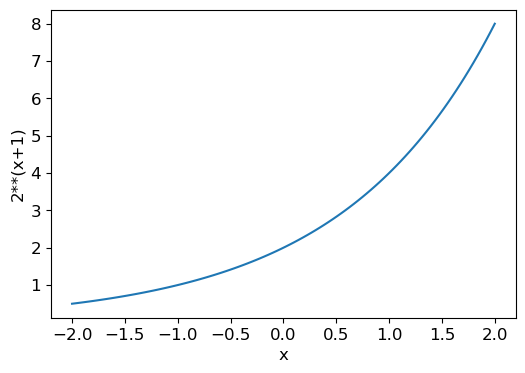

In [212]:
plot_function(h, 'x', '2**(x+1)')

In [213]:
def g(x): return x/(x**2 + 1)

In [214]:
calc_g_y_total = g(2) + g(3) + g(4) + g(5)
calc_g_x_total = 2 + 3 + 4 + 5
print(g(2), g(3), g(4), g(5))
print(calc_g_x_total/4)
print(calc_g_y_total/4)
print (calc_g_y_total/calc_g_x_total)

0.4 0.3 0.23529411764705882 0.19230769230769232
3.5
0.2819004524886878
0.08054298642533937


In [215]:
g(3),g(7)

(0.3, 0.14)

*** 


#### RESUME

*** 

For any function we can calculate it's derivative.

Derivative is another function that calculates change instead of value
ex. a derivative of a quadratic function at 3 tells us how rapidly the value changes at 3

Gradient is defines as rise/run - i.e. change in value of the function % change in the value of the parameter

If we know how our function changes, we'll know what we need to do to make is smaller

This is the key to machine learning - having a way to change parameters of a function to make it smaller

Calculus gives us a computational shortcut in the form of a derivative, which lets us directly calculate the gradients of our functions

Our function has lots of weights that we need to adjust

We won't get back one number, but many numbers

You can calculate the derivative of one weight and treat all others as constant

*Then repeat that for every weight*



PyTorch can automatically compute the derivative of almost any function very quickly 

example:
pick a tensor value we want gradients at

- note: *the notation "." just means return a float 
- 2. == float
- 2 == integer

In [216]:
xt = tensor(3.).requires_grad_()

`requires_grad_` is the method that tells it to calc. gradients with respect to the varaible at that value

it 'tagging' the variable so that pytorch will remembere to track how to compute gradients of other direct calcs. on that that you'll ask for 

*fastai syntax and deep learning syntax in general uses "gradient" to mean the value of a function's derivative at a specific argument value, it's differen than the math/physics use of the term which just describes another function*

Pytorch also focuses on the argument, not the function 

Calculate our function with that value `xt` from above

Output is the value, but also the gradient function it'll use to calc other gradients when needed

In [217]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

Now tell pytorch to calculate the gradients of the above `yt` for us

In [218]:
yt.backward()

**PYTHON SIDEBAR** <br>
While I'm thinking about it, functions that need to be called with empty parenthesis are class *instance* methods, have access through the "self" parameter and can modify the state of the object they're called 

functions witout parenthesis are *class* methods, defined at the class level, but don't operate on a specific instance of the class, they don't have access to instance state(self) and usually don't modify it

object.method() == instance method
class.method == class method

*** 

"backward" is *backpropagation* - the name given to the process of calculating the derivative of each layer

called the "backward pass" of the network vs. the "forward pass" where activations are calculated

`backward` might more accurately called `calculate_grad`, but we're stuck with this jargon

- View the gradients by checking the grad attribute of our tensor

In [219]:
xt.grad

tensor(6.)

- Repeat preceding steps, but with a vector argument for the function

In [220]:
xt = tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

- Add sum to our function so it can take a vector(rank-1 tensor) and return a scalar(rank-0 tensor)

In [221]:
def f(x): return (x**2).sum()

yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

- xt is our 1 dimensional tensor
- we've run requires_grad_() on it to give us the derivative and formula for the derivative going forward
- using `backward()` to calculate the derivative of each layer by passing that gradient function backward
- then checking the `xt` 


In [222]:
yt.backward()
xt.grad



tensor([ 6.,  8., 20.])

In [223]:
xt

tensor([ 3.,  4., 10.], requires_grad=True)

#### Stepping with a learning rate

Stepping is mulitplying the gradient by some small number called the *learning Rate*

- Learning rate is often between .001 and .1, could be anything though
- Most of the time, you just try a few see what results in a better trained model
- There's a *learning Rate Finder* that we'll get to later

Once a learning rate is chosen you adjust parameters with a simple function:

```
w -= gradient(w) * lr
```

- This is *stepping* parameters, using an *optimizer step*
- We *subtract* the `gradient * lr` from the parameter to update it. 
- This allows adjustment in the direction of the slope by increasing the parameter when slope is negative, and decreasing when positive
- All to adjust towards *minimizing loss*


- Too low of a learning rate means too many steps

<img alt="An illustration of gradient descent with a LR too low" width="400" caption="Gradient descent with low LR" src="images/chapter2_small.svg" id="descent_small"/>

- Too high is even worse, overshooting 

<img alt="An illustration of gradient descent with a LR too high" width="400" caption="Gradient descent with high LR" src="images/chapter2_div.svg" id="descent_div"/>

- If it's too high it may also bounce around instead of diverging

<img alt="An illustation of gradient descent with a bouncy LR" width="400" caption="Gradient descent with bouncy LR" src="images/chapter2_bouncy.svg" id="descent_bouncy"/>

### End-toEnd SGD Example

Looking at SGD example to see how finding a minimum can be used to train a model to fit data better

Starting with a simple, synthetic, example model
- Measuring the speed of a roller coaster as it goes over a hump
- it would be fast, slow, fast again
- We want to build a model of that speed changes over time

If you measured manually it would look like below:

In [224]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

Creating the speed variable
- create a tensor of 20 random numbers in standard normal distribution
- multiply tensor by 3
- multiply .75 x time-9.5 squared + 1

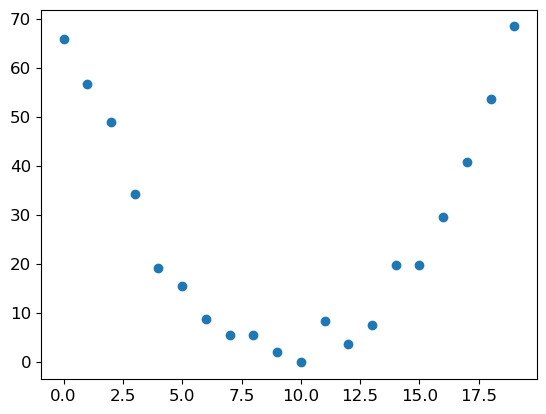

In [225]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time, speed);

Random noise bits are added since manual measurment isn't precise

Which means its not easy to answer the question: What was the coaster's speed?

- Using SGD we can try to find a function that matches our observations
- We can't consider every possible func., so we'll guess quadratic
- i.e. `a*(time**2)+(b*time)+c`
- aka `ax**2 + bx + c`

Need to distinguish clearly between the funciton's input(time when measuring speed) and its parameters(values that define *which* quadratic we're trying)

So:
- Collect params in one argument, and in doing so separate the input, t, and the parameters, `params` in the function's signature:

In [226]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c


In doing this we're restricting the problem of finding the best imaginable function that exists to finding the best QUADRATIC function.

This simplifies the problem, since every quadratic func. is defined in terms of a,b,c

So we're trying to find the best values for a,b, and c

- If we solve this problem for 3 params of quadratic func., we can apply the same approach for other more complex funcs. with more params, like a neural net

- First find params for f

We need to define what we mean by 'best'. 
- we define precisely by using a *loss function*
- it will return a value based on a prediction and a target
- lower values of the function correspond to "better" predictions
- IMPORTANT that loss funcs. return *lower* values when predictions are more accurate 
- This is because the procedure we defined earlier will try to *minimize* the loss
- For continuous data, it's common to use *mean squared error* 

Function:<br>
- take 2 arguments, preds and targets
- return the (preds-targets**2).meant()


In [227]:
def mse(preds, targets): return ((preds-targets)**2).mean()

**7 Step Process**

#### Step 1: Initialize the Parameters

Initialize to random value and tell pytorch to track their gradients with `requires_grad_`

In [228]:
params = torch.randn(3).requires_grad_()
print(params)

tensor([ 1.9983,  1.7929, -0.0986], requires_grad=True)


Clone original parameters

In [229]:
orig_params = params.clone()

#### Step 2: Calculate the Predictions

Calculate the predictions

In [230]:
preds = f(time, params)

In [231]:
print(time)
print(params)
print(preds)


tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])
tensor([ 1.9983,  1.7929, -0.0986], requires_grad=True)
tensor([-9.8640e-02,  3.6925e+00,  1.1480e+01,  2.3264e+01,  3.9045e+01,  5.8823e+01,  8.2597e+01,  1.1037e+02,  1.4213e+02,  1.7790e+02,  2.1766e+02,  2.6141e+02,  3.0917e+02,  3.6092e+02,
         4.1666e+02,  4.7641e+02,  5.4015e+02,  6.0788e+02,  6.7962e+02,  7.5535e+02], grad_fn=<AddBackward0>)


Create a small function to show how close our predictions are to our target
- if the ax doesn't exist 

In [232]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)


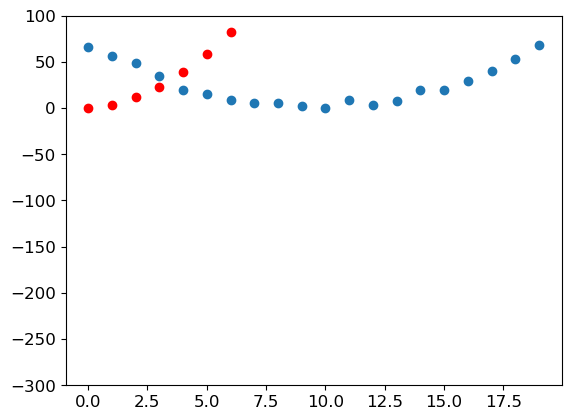

In [233]:
show_preds(preds)

#### Step 3: Calculate the Loss

Calc as follows:


In [234]:
loss = mse(preds, speed)
loss

tensor(110953.2500, grad_fn=<MeanBackward0>)

#### Step 4: Calculate the Gradients

- Calc the gradients - aka an approximation of how the parameters need to change

In [235]:
loss.backward()
params.grad

tensor([111401.5156,   7175.1157,    476.1424])

- Use the gradients to improve parameters
- Need to pick a learning rate
- For now just use 1e-5 or .000001

In [236]:
params.grad * 1e-5

tensor([1.1140, 0.0718, 0.0048])

In [237]:
params

tensor([ 1.9983,  1.7929, -0.0986], requires_grad=True)

#### Step the weights

- Need to update the parameters based on the gradients we just calculated:

In [238]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None



- using `.data` on `params` above returns the tensor without the gradient requirement that's attached
- using `.grad.data` returns the gradients associated with the params
- assigning `None` to `grad` clears the gradient values and tensor type
- *using the chain rule on all of this*

Check to see if loss improves:

In [239]:
preds = f(time, params)
mse(preds, speed)

tensor(21537.9688, grad_fn=<MeanBackward0>)

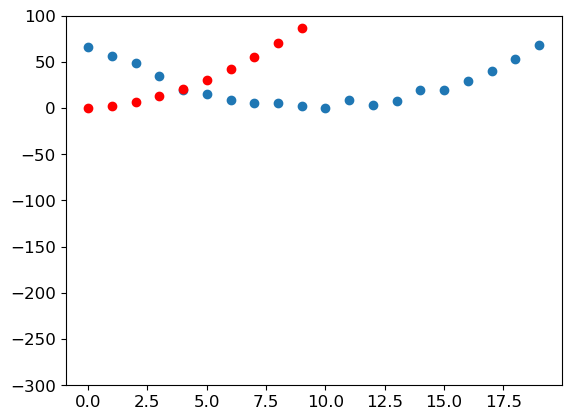

In [240]:
show_preds(preds)

We need to repeat so we'll bundle into a function that moves a single step

- function takes params and prn(which defaults to True)
- run our `f` function on time and params, solving quadtratic equation at each `param` and returning a tensor value at each item
- calculate our loss with means squared error of our prediction vs observed speed
- use *backpropagation* with `.backward()` to calculate the gradients of params, which `requires_grad_()` and is waiting for it
- apply our previously defined *learning rate* as an adjustment
    - do this by subtracting the `lr` * *gradient* from our *predictions* which we got from our `params`
- clear the gradient values and tensor
- print the loss unless `prn` is passed a `False` value
- return `preds`

In [241]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

#### Step 6: Repeat the process

Iterate over our function to apply several steps at once

In [242]:
for i in range(10): apply_step(params)

21537.96875
4617.86083984375
1416.05078125
810.1636962890625
695.5045776367188
673.8007202148438
669.6868896484375
668.9017333984375
668.7463989257812
668.7101440429688


Loss is going down like we hoped for - need to take a look visually

Reset our `params` to before we started messing with them 

In [243]:
params = orig_params.detach().requires_grad_()

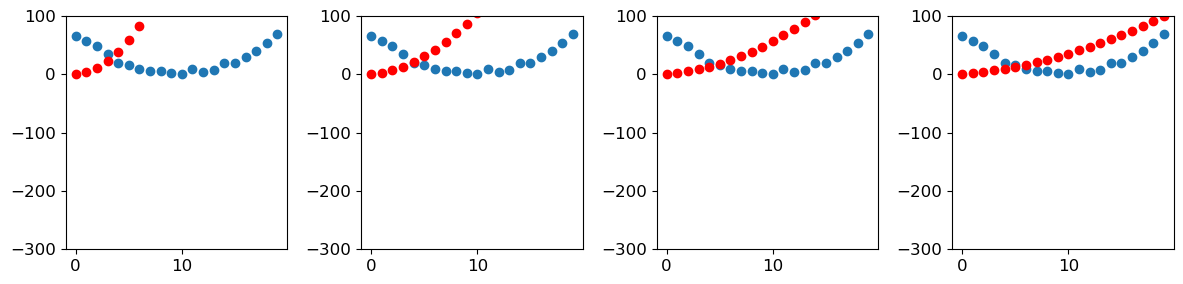

In [244]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

As we can see above, we're approaching the best possible quadratic function for our data

#### Step 7: Stop

We decide to stop after 10 epochs arbitrarily
- in reality we would watch training and validation losses and our metrics to decide when to stop

#### Summarizing Gradient Descent

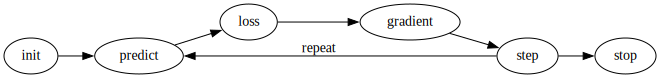

In [245]:
#hide_input
#id gradient_descent
#caption The gradient descent process
#alt Graph showing the steps for Gradient Descent
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

To summarize:
- At the beginning our weights can be random(from *scratch*) or come from a pretrained model(*transfer learning*)
- From scratch, our outputs won't have anything to do with what we wan
- From transfer learning, likely the pretrained won't be good at the specific task we want
- Regardless it'll need to *learn* better weights

- Begin by comparing the outputs our models gives us to our targets
- (we have labeled data, so we know what result the model should give)
- We do this using a *loss function*, which returns a number that we want to make as low as possible by improving *weights* 
- To do this we take a few data items from the training set and feed them to the model
- We compare corresponding targets using *loss function*
- The return tells us if it's improving or not
- Weights then change to make it slightly better


- To find how to change weights to make loss better we use calculus to calculate *gradients*(via pytorch)
- We use the magnitude of the *gradient*(steepness of slope) to tell us how big to step
- We mulitply the *gradient* by a number we choose *learning rate* to decide step size
- We then *iterate* until we have reached the lowest point and we can *stop*


### The MNIST Loss Function

We already have our independant variables `x` -- These are the images themselves.

We'll concatonate them all into a single tensor

And change them from a list of matrices(rank 3 tensor) to a list of vectors(rank 2 tensor).

We can do this using `view`, which is a pytorch method that changes the shape of a tensor without changing it's contents 

`-1` is a special parameter to `view` that means "make this axis as large as necessary to fit all the data"


- Concatenate stacked_threes and stacked sevens
- pass to view
- view changes shape of tensor with -1 to our shape 28x28

In [246]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

Label each image 
- Label 3s as `1`
- Label 7s as `0`

*** 

#### Quick Experiment

- Find what train_y(below) is doing and why

In [247]:
test_trainer = tensor([1]*len(test_tensor))
test_trainer


tensor([1, 1, 1])

In [248]:
test_trainer = tensor([1]*len(test_tensor) + [0]*len(test_tensor_2))
test_trainer

tensor([1, 1, 1, 0, 0, 0])

In [249]:
test_trainer = tensor([1]*len(test_tensor) + [0]*len(test_tensor_2)).unsqueeze(1)
test_trainer

tensor([[1],
        [1],
        [1],
        [0],
        [0],
        [0]])

It looks like unsqueeze is pushing it to this shape, and we're going to `zip` train_x and train_y later, in order, so their 0 & 1 labels will correspond

*** 

#### Resume

In [250]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

A `Dataset` in pytorch is *required* to return a tuple of (x,y) when indexed

Python provides a `zip` function, which when combined with `list`, provides a simple way to get this functionality

- We're zipping our train_x and train_y
- Converting those zipped values to a list
- Looking at the dset list at index 0, our tensor 1 tells us that the image at this index should be a 3

In [251]:
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

- Repeat the same steps for the validation sets

In [252]:
stacked_threes.shape
stacked_sevens.shape
valid_3_tens.shape
valid_7_tens.shape

torch.Size([1028, 28, 28])

In [253]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dst = list(zip(valid_x, valid_y))


- Need to *initialize* with a random weight
- Do this in the below with `randn` which returns random numbers with a mean `0` and standard deviation of 1 at the `size` passed
- We'll give an optional argument `std` that we can pass and change the standard deviation with if needed, otherwise default to 1
- Use requires_grad_() to prepare it to receive `.backward` results through backpropagation(aka, get the gradients)

In [254]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [255]:
weights = init_params((28*28,1))

- The func weights*pixels won't be flexible enough 
- It is always == 0 when pixels == 0(i.e. *intercept* is 0)
- basically in `y=w*x + b`, we still need the `b`

So let's initialize that to a random number as well


In [256]:
bias = init_params(1)
bias

tensor([0.4848], requires_grad=True)

- **In neural networks, the `w` in `y=wx+b` is called the *weights*, and the `b` is called the *bias***
- Together the weights and bias make up the ***parameters***

We can now calculate a prediction for one image:
- grab a single image to train from train at index `0`
- multiply by the weights tensor using `T` method
- get the sum of all numbers in the resulting tensor
- add the bias

In [257]:
(train_x[0]*weights.T).sum() + bias

tensor([-17.2289], grad_fn=<AddBackward0>)

- We could calculate the prediction using a `for` loop, but they *don't run on the GPU*
- Also python is a slow language for `for` loops in general
- We need to represent as much of the computation in a model as possible using higher level functions


- For this there's a mathematical operation that calcs `w*x` for every row of a matrix
- Called *matrix multiplication*


<img alt="Matrix multiplication" width="400" caption="Matrix multiplication" src="images/matmul2.svg" id="matmul"/>

- This shows matrix `a` * matrix `b`
- See http://matrixmultiplication.xyz/ for visual examples
- Look at intro to matrix multiplication on Khan academy if more needed

**In python matrix multiplication is represented with the `@` operator

In [258]:
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[-17.2289],
        [-14.7152],
        [ -6.9665],
        ...,
        [ -8.0796],
        [-17.8650],
        [ -3.8336]], grad_fn=<AddBackward0>)

- First element is the same as the one we calculated above, of course
- **This equation *batch@weights + bias* is one of the two fundamental equations of any neural network**
- The other is the *activation function*, which will be shown in a bit

- Check accuracy
- To find if an output represents a 3 or a 7, we can just check if it's greater than 0.0
- Our accuracy for each can be calculated using *broadcasting* instead of for loops:

In [259]:
corrects = (preds>0.0).float() == train_y
corrects

tensor([[False],
        [False],
        [False],
        ...,
        [ True],
        [ True],
        [ True]])

In [260]:
corrects.float().mean().item()

0.48814132809638977

- Now test the accuracy for a small change in one of the weights
- We have to ask pytorch not to calculate gradients when we do this 

In [261]:
with torch.no_grad(): weights[0] *= 1.0001

In [262]:
preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

0.48814132809638977

- As demonstrated, we need *gradients* to improve our model with SGD
- In order to calc *gradients* we need some *loss function* that represents how good our model is
- Because *gradients* are a measure of how that *loss function* changes with small tweaks to the weights

- We need a *loss function*
- Obvious option is *accuracy*, which is our metric
- If that case we 
    - calc predictions for each image
    - collect these values to calc an overall accuracy
    - calc gradients of each weight with respect to that overall accuracy

- BUT, there's a technical problem
- *gradient* of a function is its *slope*, aka steepness
- This is just rise/run
    - `(y_new - y_old) / (x_new / x_old)`
- This gives us a good appx. of the *gradient* when `x_new` is very similar to `x_old` aka their difference is very small
- But accuracy only changes at all when a prediction changes from a 3 to a 7, or vice versa
- A small change in weighs from `x_new` to `x_old` isn't likely to cause any prediction to change, so `(y_new - y_old)` will almost always be 0. In other word, the gradient is 0 almost everywhere

A very small change in the value of a weight will often not change the accuracy at all.

This means it's not good to use accuracy as a *loss function* 

If we do, most of the time our *gradients* will actually be 0 and the model won't learn from that number 


- Mathematically, accuracy is a function that's constant almost everywhere (except at the threshold, 0.5), so its derivative is nil almost everywhere (and infinity at threshold)
- Returns `gradients` that are 0 or infinite - so functionally useless 

Instead we need a loss function that, when our weights result in  slightly better predictions, give us slightly better loss
- What does this look like?
    - For this, when it's a 3, score is slightly higher, when 7, slightly lower

Loss function receives not the images, but the predictions from the model
- We'll make one argument, `prds` of values between 0 and 1
- Where each value is a prediction that the image is a 3
- It's a vector(rank-1 tensor) indexed over images


The purpose of the loss function is to measure the distance between predicted and true values(targets/labels)

Create another argument `trgts` with values between 0 and 1 that tell if it's a 3 or not
- this is also a vector(rank-1 tensor) indexed over images 


Assuming we have a 3, a 7, and another 3
- assume model predicts 90%(high confidence) that first was in fact a 3
- assume model predicts 40%(slight confidence) that the second was a 7
- assume model predicts 20%(fair confidence), erroneously, that thrid was a 7


Given the above, our loss function would recieve the below values as inputs

In [263]:
trgts = tensor([1,0,1])
prds = tensor([0.9, 0.4, 0.2])

Here's first pass at *loss function* that measures distance between `predictions` and `targets`

In [264]:
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()

Above is a new function, `torch.where(a,b,c)`. 

This is the same as a list comprehension `[b[i] if a[i] else c[i] for i in range(len(a))]`

**except it works on tensors, at C/CUDA speed**


Translation of the above:
    - func will measure how distance each prediction is fromm 1 if it should be 1
    - how distant it is from 0 if it should be 0
    - Then take a mean of all the distances 

Testing on `prds` and `trgts`

In [265]:
torch.where(trgts==1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])

- Func returns lower number when predictions are more accurate, when accurate predictions are more confident(higher absolute vals), and when inaccurate preds are less confident
- in pytorch we'll always assume a lower value of loss function is better


We need a scarlar for the final loss - `mnist_loss` takes the mean of the previous tensor

In [266]:
mnist_loss(prds, trgts)

tensor(0.4333)

If we change our prediction for the one "false" target from `0.2` to `0.8`the loss will go down, indicating it's a better prediction

In [267]:
mnist_loss(tensor([0.9, 0.4, 0.8]), trgts)

tensor(0.2333)

Problem: As `mnist_loss` is currently defined it always assumes predictions are between 0 and 1.

We need to ensure that this is actually the case

There is a function that can handle this for us

#### Sigmoid

The `sigmoid` function always outputs a number between 0 and 1

It's defined as follows:

In [268]:
def sigmoid(x): return 1/(1+torch.exp(-x))

Pytorch has an accelerated version for us

So we don't need to re-invent the wheel

This is an important function in deep learning because we often want to ensure values are between 0 and 1

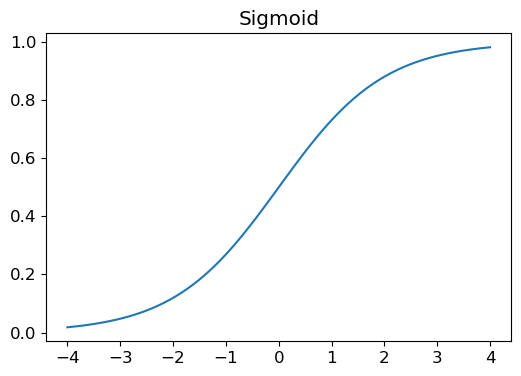

In [269]:
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

- It takes any value, positive or negative, and smooshes it onto an output value of 0 and 1.
- It's also a smooth curve that only goes up, which makes it easier for SGD to find meaningful gradients

Time to update `mnist_loss` to first apply `sigmoid` to the inputs

In [270]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

- We can now be confident that our predictions will work, even if they're not 0 or 1
- All that's required is that a higher prediction corresponds to a higher confidence that a number is a 3
- We already have accuracy as metric, so why define loss?



- The metric is to drive human understanding
- The loss is to drive automated learning
- To drive automated learning the loss must be a function with a that has a meaningful derivative
- It can't have flat section/large jumps, it needs to be smooth
- Sometimes using this means that it doesn't exaclty reflect what we want to achieve, but it's a compromise between our real goal and what can be optimized using it's gradient

- The loss function is calculated for each item in our dataset
- then at the end of an epoch, the loss values are all averaged and the overall mean reported for the epoch

- Metrics are the numbers that we really care about 
- These area the values that are printed out at the end of each epoch that tell us how our model is really doing

- Important to focus on metrics rather than loss to judge a model's performance 

*** 

#### SGD and Mini-Batches

Now that we have a loss function the works, we can look at some of the details of the next phase of the learning process

That is to change and update the weights based on the gradients

Known as the *optimization step*

- In order to take this step we need to calculate loss over 1+ data items
- How many to use?
- We could do whole set, an average, or a single item
    - whole set is a very long time
    - single item wouldn't use much information and be imprecise
- Compromise of the two
    - Calculate the average loss for a few items at a time(*mini-batch*)
- Num of items in *mini-batch* is called the *batch size*
    - Larger means you'll get a more accurate and stable estimate of the datasets gradients
        - But it will take longer and you will process fewer mini-batches per epoch

- Another good reason for *mini batches* rather than gradient on individual items is that we're running on an accelerator(GPU)
    - These only perform well if they have a lot to work on at one time
    - If you give too much, it may run out of memory, so have to balance
- As discussed in data augmentation, we get better generalization if we can vary things during training
    - One simple thing to vary is what data items are put in our *mini-batch*
- Rather than enumerating our dataset in order every epoch
    - We normally randomly shuffle it on every epoch, before we create *mini-batches*
- **Shuffling and mini-batch collation are done for you in fastai wiht `DataLoader`**

- A `DataLoader` can take any python collection and turn it into an iterator over mini-batches like below:

- assigning a range of 15 numbers
- passing to dataloader
- splitting it into batches of 5 (3 batches)
- shuffling each(no repeats)
- returns a dataloader object that contains 3 tensors

In [271]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 3,  2, 10,  9, 13]),
 tensor([14,  6,  8,  0,  1]),
 tensor([ 7,  4,  5, 12, 11])]

For training we don't want any python collection, but a collection containing independant and dependant variable(the inputs and targets of the model)

A collection that contains tuples of independant and dependant variables is known in pytorch as a `Dataset`

Example of a simple `Dataset` below:

In [272]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

When we pass a `Dataset` to a `DataLoader` we'll get back mini-batches

Which are themselves tuples of tensors - representing batches of independant and dependant variables

In [273]:
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([ 3, 16, 17,  8,  7,  2]), ('d', 'q', 'r', 'i', 'h', 'c')),
 (tensor([10, 22,  4, 14, 25, 15]), ('k', 'w', 'e', 'o', 'z', 'p')),
 (tensor([ 1, 12, 19,  5,  9, 11]), ('b', 'm', 't', 'f', 'j', 'l')),
 (tensor([ 0, 23, 21, 13, 18, 20]), ('a', 'x', 'v', 'n', 's', 'u')),
 (tensor([ 6, 24]), ('g', 'y'))]

## Putting it all together

Time to implement the process we saw in *gradiend descent*

In code, our process will be implemented with something looking like this for each epoch:

```python
for x,y in dl:
    pred = model(x)
    loss = loss_func(pred, y)
    loss.backward()
    parameters -= parameters.grad * lr
```


First, reinitialize parameters:

In [274]:
weights = init_params((28*28,1))
bias = init_params(1)

A `DataLoader` can be created from a `Dataset`:

In [275]:
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

Same goes for the validation set

In [276]:
valid_dl = DataLoader(valid_dst, batch_size=256)

- Create a mini batch of size 4 for testing

In [277]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [278]:
preds = linear1(batch)
preds

tensor([[6.2677],
        [3.3820],
        [1.7467],
        [4.4054]], grad_fn=<AddBackward0>)

In [279]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.0488, grad_fn=<MeanBackward0>)

Now we can calculate the gradients:

In [280]:
loss.backward()
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784, 1]), tensor(-0.0063), tensor([-0.0430]))

Putting it all into a function

In [281]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

and testing it

In [282]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0125), tensor([-0.0860]))

Now watch what happens when it's done twice

In [283]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0188), tensor([-0.1290]))

The gradients have changed
    - The reason for that is `loss.backward` actually *adds* the gradients of `loss` to any gradients that are currently stored

So we have to actually set the gradient to 0 first:

In [284]:
weights.grad.zero_()
bias.grad.zero_();

**NOTE**
Inplace Operations<br>
Methods in PyTorch whose names end in an underscore modify their objects *in place*.

For instanace `bias.zero_()` sets all elements of the tensor `bias` to 0

Our only remaining step is to update the weights and biases based on the gradient and learning rate

When we do so we have to be explicit with pytorch not to take the gradient of this step too

Otherwise things will get very confusing when we try to compute the derivative of the next batch

If we assign to the `data` attribute of a tensor, pytorch will not take the gradient of that step

Basic loop for an epoch is below:


In [285]:
def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

Also want to see how we're doing by measuring against the validation set.

To see if an output represents a 3 or a 7 we can just check if it's greater than 0. 

So our accuracy for each item can be calculated(use broadcasting, not loops!) with:

In [286]:
(preds>0.0).float() == train_y[:4]

tensor([[True],
        [True],
        [True],
        [True]])

That gives this func. to calculate validation accuracy:

In [287]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

We can check if it works:


In [288]:
batch_accuracy(linear1(batch), train_y[:4])


tensor(1.)

and then put batches back together

In [289]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [290]:
validate_epoch(linear1)

0.5184

That's the starting point

Now train for one epoch and see if the accuracy improves


In [291]:
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.641

Then a few more

In [292]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.8462 0.9169 0.9413 0.9536 0.9609 0.9628 0.9648 0.9677 0.9687 0.9696 0.9706 0.9711 0.9711 0.9711 0.9725 0.9725 0.973 0.9735 0.9745 0.9755 

Looks about right

We're at the same accuracy as our "pixel similarity approach" 

and we've creaed a general purpose foundation we can build on

Next step is to create an object that will handle the SGD step for us

In pytorch it's called an *optimizer*


### Creating an Optimizer